# Proyecto: DBSCAN con Reducción Dimensional (t-SNE y UMAP)

**Autores**: MERCHAN • OCHOA • PULIDO • SOSA

---

## Objetivos del Proyecto

1. Cargar y explorar dataset Iris
2. Aplicar preprocesamiento de datos
3. Implementar **t-SNE** → Visualizar → Aplicar **DBSCAN** → Evaluar
4. Implementar **UMAP** → Visualizar → Aplicar **DBSCAN** → Evaluar
5. Comparar resultados de ambos métodos

---

## Fase 1: Configuración Inicial y Exploración de Datos

En esta fase vamos a:
- Instalar y cargar librerías necesarias
- Cargar el dataset
- Realizar análisis exploratorio inicial
- Visualizar los datos originales

### 1.1 Instalación de Dependencias

In [ ]:
# Instalación de dependencias
#!pip install -q umap-learn scikit-learn pandas numpy matplotlib seaborn plotly tqdm

print(" Librerías listas para importar")

✓ Librerías listas para importar


### 1.2 Importación de Librerías

In [ ]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print(" Librerías importadas correctamente")
print(f"  • NumPy versión: {np.__version__}")
print(f"  • Pandas versión: {pd.__version__}")

✓ Librerías importadas correctamente
  • NumPy versión: 2.0.2
  • Pandas versión: 2.2.2


### 1.3 Carga del Dataset

Vamos a cargar el dataset **Iris** como ejemplo inicial. Puedes cambiar a `load_digits()` o `load_wine()` si lo deseas.

In [14]:
# Cargar dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("=" * 60)
print("DATASET CARGADO: IRIS")
print("=" * 60)
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases: {len(target_names)} → {target_names}")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print("=" * 60)

DATASET CARGADO: IRIS
Número de muestras: 150
Número de características: 4
Clases: 3 → ['setosa' 'versicolor' 'virginica']
Forma de X: (150, 4)
Forma de y: (150,)


### 1.4 Análisis Exploratorio de Datos (EDA)

In [15]:
# Crear DataFrame para análisis más fácil
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({i: name for i, name in enumerate(target_names)})

# Mostrar primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras 5 filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.1000

In [16]:
# Información del dataset
print("Información del Dataset:")
print(df.info())

print("\nValores faltantes:")
print(df.isnull().sum())

print("\nDistribución de clases:")
print(df['species'].value_counts())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Valores faltantes:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Distribución de clases:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 1.5 Visualización de Datos Originales

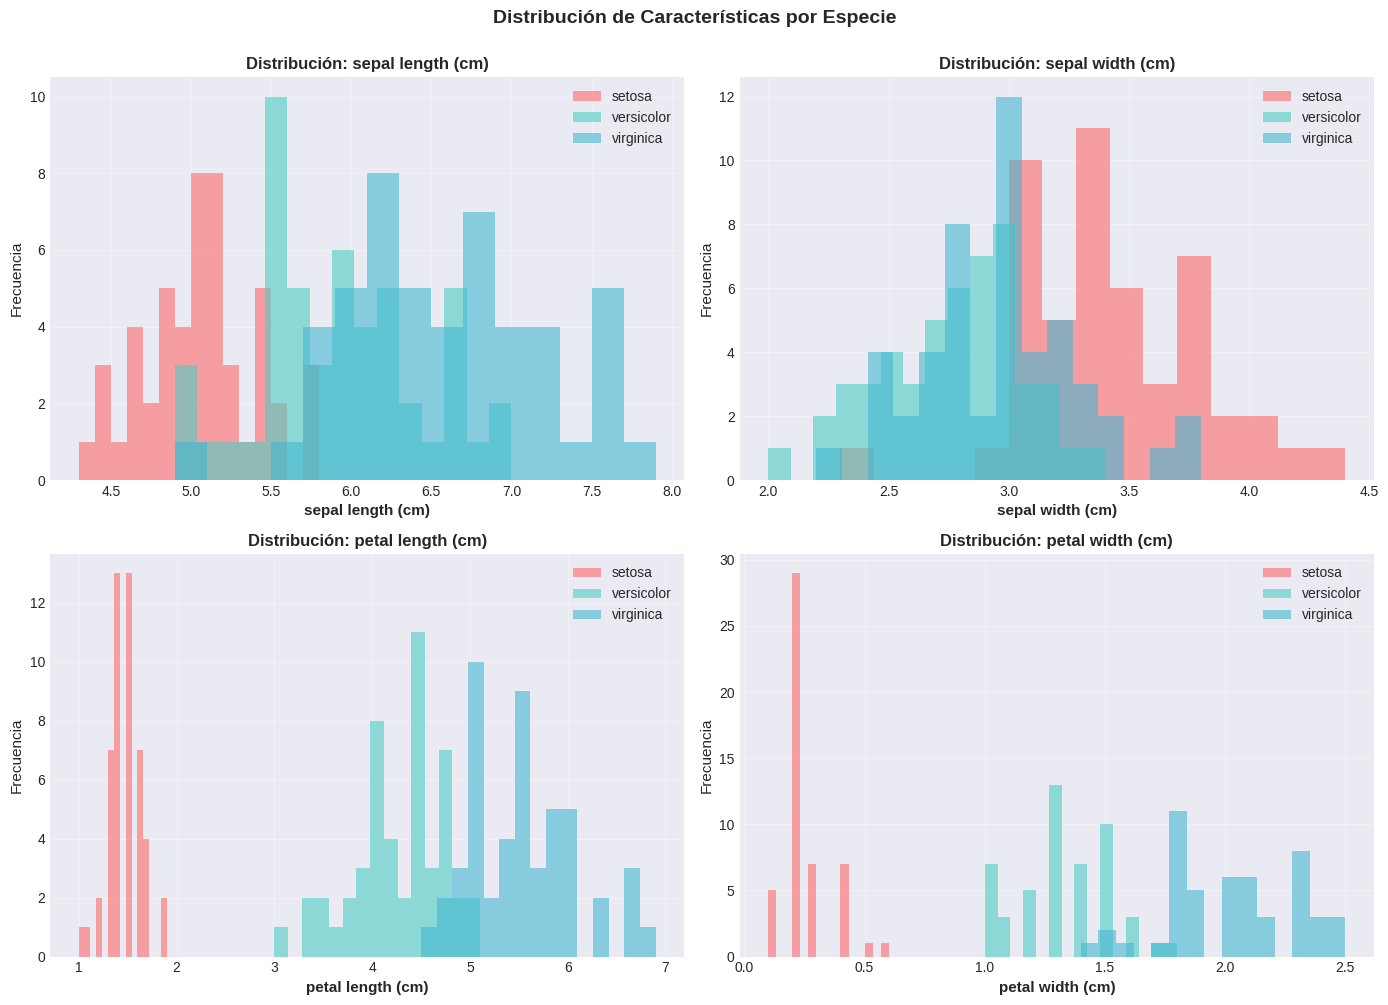

In [17]:
# Visualización 1: Distribución de características
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, feature in enumerate(feature_names):
    ax = axes[idx // 2, idx % 2]
    
    for i, species in enumerate(target_names):
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.6, label=species, bins=15, color=colors[i])
    
    ax.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.set_title(f'Distribución: {feature}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribución de Características por Especie', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

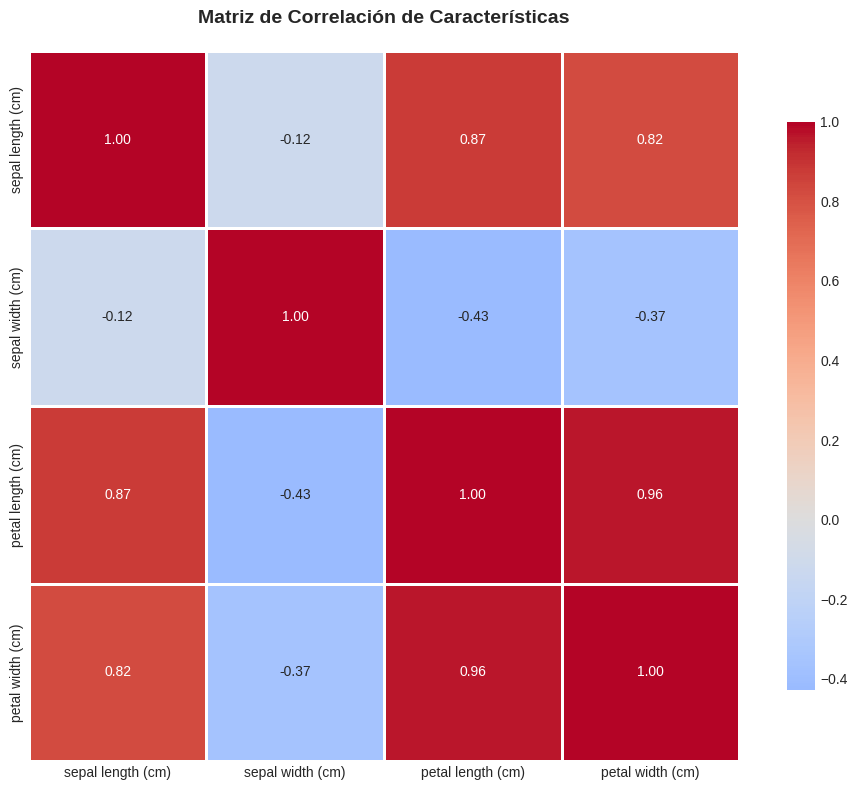


Correlaciones más fuertes:
petal length (cm)  petal width (cm)     0.962865
petal width (cm)   petal length (cm)    0.962865
sepal length (cm)  petal length (cm)    0.871754
dtype: float64


In [18]:
# Visualización 2: Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, 
            cbar_kws={"shrink": 0.8}, fmt='.2f')

plt.title('Matriz de Correlación de Características', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes:")
# Obtener correlaciones (excluyendo diagonal)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.sort_values(ascending=False).head(3))

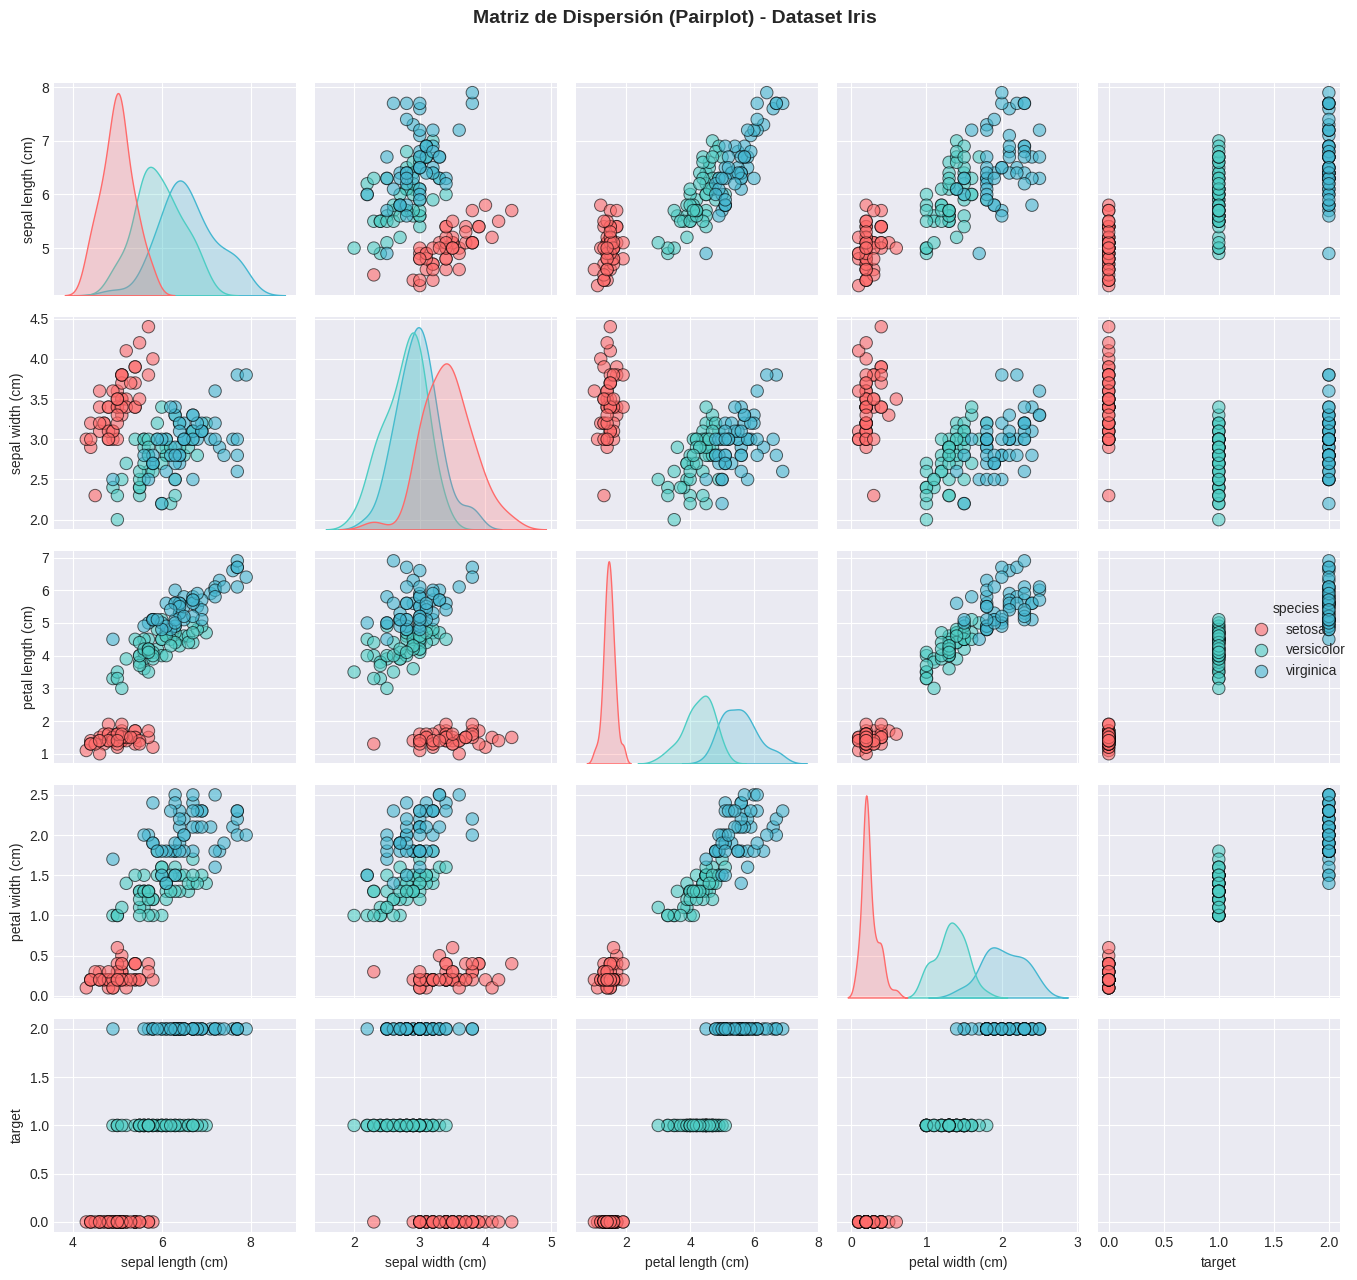

In [19]:
# Visualización 3: Pairplot (Scatter matrix)
# Seleccionamos solo las primeras 4 características para mejor visualización
sns.pairplot(df, hue='species', palette=colors, 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'black'},
             height=2.5)

plt.suptitle('Matriz de Dispersión (Pairplot) - Dataset Iris', 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

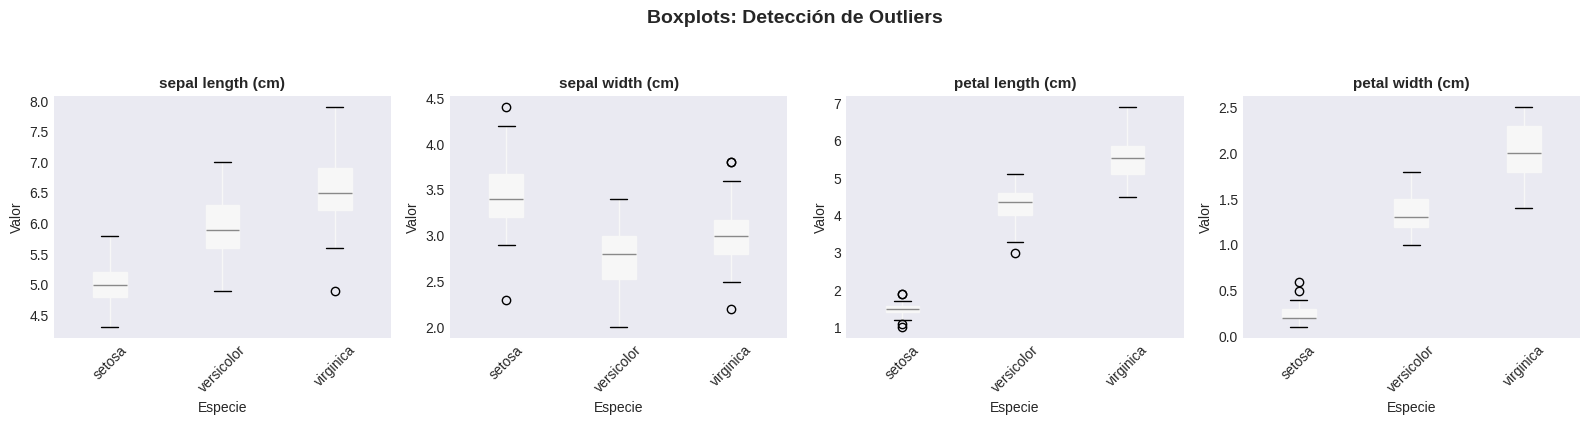

In [20]:
# Visualización 4: Boxplots para detectar outliers
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, feature in enumerate(feature_names):
    df.boxplot(column=feature, by='species', ax=axes[idx], 
               patch_artist=True, grid=False)
    axes[idx].set_title(feature, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Especie', fontsize=10)
    axes[idx].set_ylabel('Valor', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks(rotation=45)

plt.suptitle('Boxplots: Detección de Outliers', 
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

---

## 📌 Fase 2: Preprocesamiento de Datos

En esta fase vamos a:
- Estandarizar los datos (media=0, desviación estándar=1)
- Normalizar si es necesario
- Preparar los datos para reducción dimensional
- Verificar la calidad del preprocesamiento

### 2.1 Importar Librerías de Preprocesamiento

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

print(" Librerías de preprocesamiento importadas")

 Librerías de preprocesamiento importadas


### 2.2 Análisis Pre-Preprocesamiento

Antes de estandarizar, veamos las estadísticas de los datos originales:

In [22]:
# Estadísticas de los datos originales
print("=" * 70)
print("ESTADÍSTICAS DE DATOS ORIGINALES")
print("=" * 70)

for i, feature in enumerate(feature_names):
    print(f"\n{feature}:")
    print(f"  • Media: {X[:, i].mean():.4f}")
    print(f"  • Desviación Estándar: {X[:, i].std():.4f}")
    print(f"  • Mínimo: {X[:, i].min():.4f}")
    print(f"  • Máximo: {X[:, i].max():.4f}")
    print(f"  • Rango: {X[:, i].max() - X[:, i].min():.4f}")

ESTADÍSTICAS DE DATOS ORIGINALES

sepal length (cm):
  • Media: 5.8433
  • Desviación Estándar: 0.8253
  • Mínimo: 4.3000
  • Máximo: 7.9000
  • Rango: 3.6000

sepal width (cm):
  • Media: 3.0573
  • Desviación Estándar: 0.4344
  • Mínimo: 2.0000
  • Máximo: 4.4000
  • Rango: 2.4000

petal length (cm):
  • Media: 3.7580
  • Desviación Estándar: 1.7594
  • Mínimo: 1.0000
  • Máximo: 6.9000
  • Rango: 5.9000

petal width (cm):
  • Media: 1.1993
  • Desviación Estándar: 0.7597
  • Mínimo: 0.1000
  • Máximo: 2.5000
  • Rango: 2.4000


### 2.3 Estandarización (StandardScaler)

- t-SNE y DBSCAN son sensibles a la escala de las características
- La estandarización transforma los datos para que tengan media=0 y desviación estándar=1
- Evita que características con rangos grandes dominen el análisis

In [25]:
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

print("=" * 70)
print(" ESTANDARIZACIÓN COMPLETADA")
print("=" * 70)
print(f"Forma de X_scaled: {X_scaled.shape}")
print(f"Tipo de datos: {X_scaled.dtype}")
print("\nVerificación de la estandarización:")

for i, feature in enumerate(feature_names):
    print(f"\n{feature}:")
    print(f"  • Media: {X_scaled[:, i].mean():.6f} (debe ser ≈ 0)")
    print(f"  • Desv. Estándar: {X_scaled[:, i].std():.6f} (debe ser ≈ 1)")
    print(f"  • Mínimo: {X_scaled[:, i].min():.4f}")
    print(f"  • Máximo: {X_scaled[:, i].max():.4f}")

print("=" * 70)

 ESTANDARIZACIÓN COMPLETADA
Forma de X_scaled: (150, 4)
Tipo de datos: float64

Verificación de la estandarización:

sepal length (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -1.8700
  • Máximo: 2.4920

sepal width (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -2.4339
  • Máximo: 3.0908

petal length (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -1.5676
  • Máximo: 1.7858

petal width (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -1.4471
  • Máximo: 1.7121


### 2.4 Visualización: Antes vs Después de Estandarización

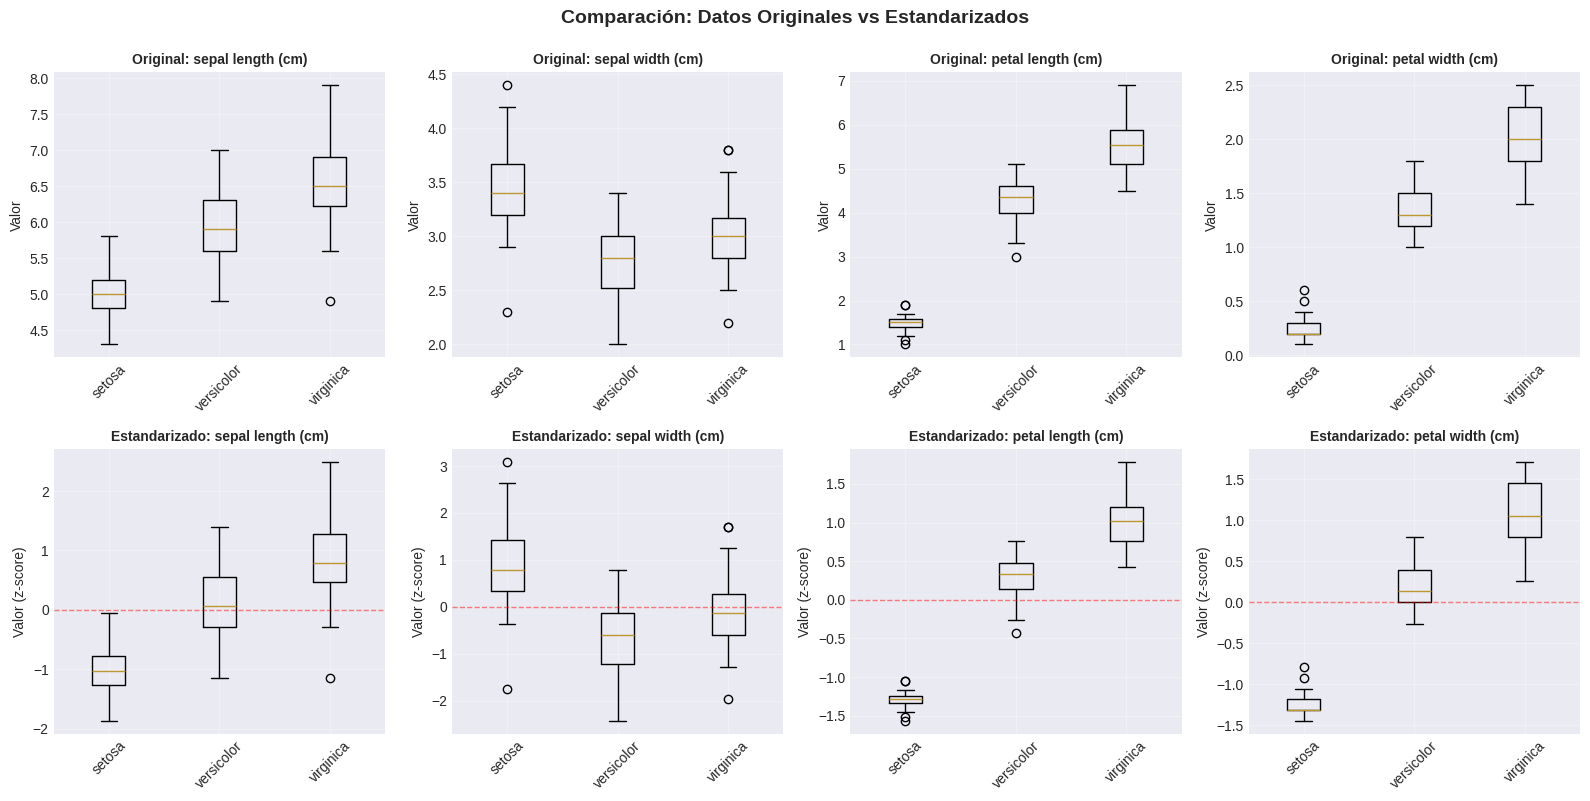

In [26]:
# Comparación visual: Datos originales vs estandarizados
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Datos originales (fila superior)
for i, feature in enumerate(feature_names):
    axes[0, i].boxplot([X[y == j, i] for j in range(3)], 
                       labels=target_names)
    axes[0, i].set_title(f'Original: {feature}', fontsize=10, fontweight='bold')
    axes[0, i].set_ylabel('Valor')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].tick_params(axis='x', rotation=45)

# Datos estandarizados (fila inferior)
for i, feature in enumerate(feature_names):
    axes[1, i].boxplot([X_scaled[y == j, i] for j in range(3)], 
                       labels=target_names)
    axes[1, i].set_title(f'Estandarizado: {feature}', fontsize=10, fontweight='bold')
    axes[1, i].set_ylabel('Valor (z-score)')
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].tick_params(axis='x', rotation=45)
    axes[1, i].axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.5)

plt.suptitle('Comparación: Datos Originales vs Estandarizados', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 2.5 Comparación de Distribuciones

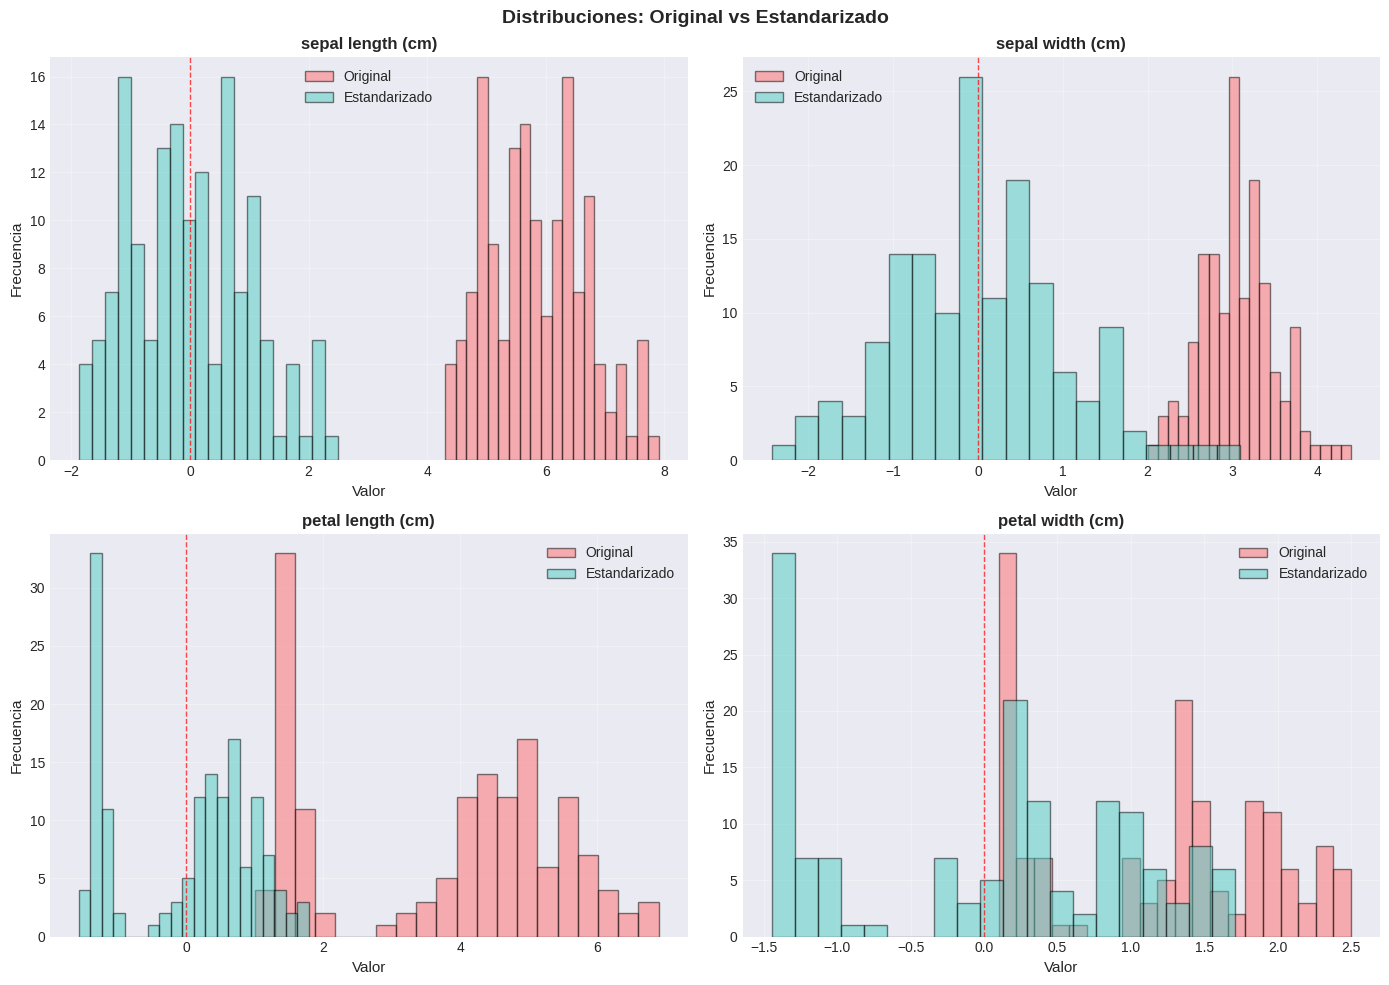

In [27]:
# Comparación de distribuciones con histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(feature_names):
    ax = axes[i // 2, i % 2]
    
    # Datos originales
    ax.hist(X[:, i], bins=20, alpha=0.5, label='Original', 
            color='#FF6B6B', edgecolor='black')
    
    # Datos estandarizados
    ax.hist(X_scaled[:, i], bins=20, alpha=0.5, label='Estandarizado', 
            color='#4ECDC4', edgecolor='black')
    
    ax.set_xlabel('Valor', fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.suptitle('Distribuciones: Original vs Estandarizado', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.6 Crear DataFrame con Datos Preprocesados

In [29]:
# Crear DataFrame con datos estandarizados para análisis posterior
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['target'] = y
df_scaled['species'] = df_scaled['target'].map({i: name for i, name in enumerate(target_names)})

print("=" * 70)
print(" DataFrame con datos preprocesados creado")
print("=" * 70)
print("\nPrimeras 5 filas (datos estandarizados):")
print(df_scaled.head())

print("\nEstadísticas de datos estandarizados:")
print(df_scaled[feature_names].describe())

 DataFrame con datos preprocesados creado

Primeras 5 filas (datos estandarizados):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Estadísticas de datos estandarizados:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+

### 2.7 Verificación de la Matriz de Correlación Post-Preprocesamiento

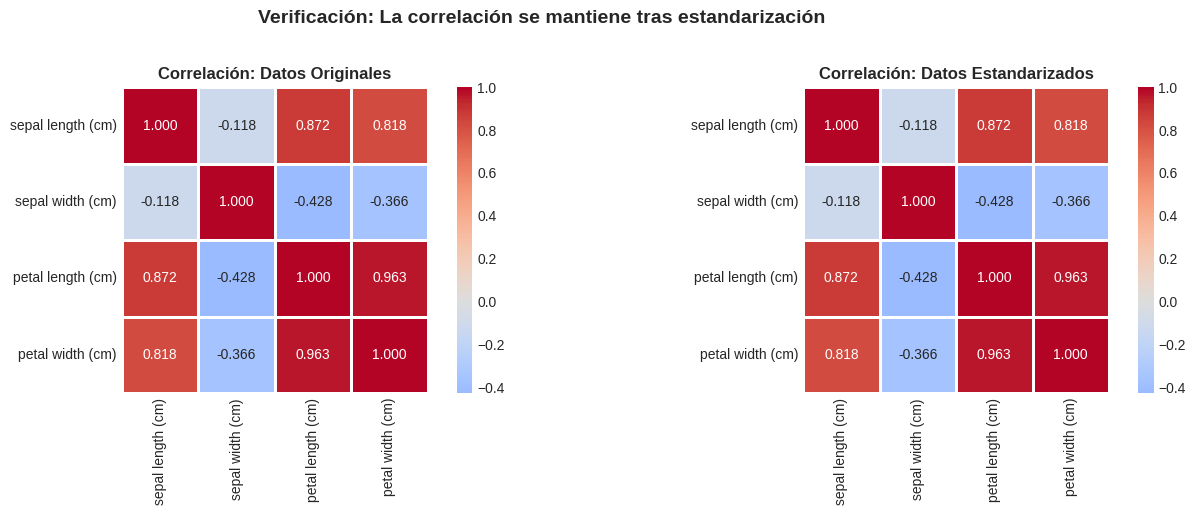

In [31]:
# Verificar que la correlación no cambia con la estandarización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Correlación de datos originales
sns.heatmap(df[feature_names].corr(), annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=axes[0], fmt='.3f')
axes[0].set_title('Correlación: Datos Originales', fontsize=12, fontweight='bold')

# Correlación de datos estandarizados
sns.heatmap(df_scaled[feature_names].corr(), annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=axes[1], fmt='.3f')
axes[1].set_title('Correlación: Datos Estandarizados', fontsize=12, fontweight='bold')

plt.suptitle('Verificación: La correlación se mantiene tras estandarización', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()